Created sample_reviews.csv
Reviews Dataset:
                                         review_text
0  I love this iPhone 14 Pro! The camera quality ...
1  Samsung Galaxy S23 is okay but the battery lif...
2  The Nike Air Max shoes are comfortable but exp...
3  This MacBook Pro M2 is incredibly fast. Apple'...
4  Amazon Echo Dot works well with Alexa. Amazon ...

Processing reviews...
Processed review 1/10
Processed review 2/10
Processed review 3/10
Processed review 4/10
Processed review 5/10
Processed review 6/10
Processed review 7/10
Processed review 8/10
Processed review 9/10
Processed review 10/10

Analysis Results:
   review_id sentiment  confidence
0          0  Positive    0.999995
1          1   Neutral    0.500000
2          2   Neutral    0.500000
3          3   Neutral    0.500000
4          4  Positive    0.999990
Saved visualization to images/nlp_analysis.png
Results saved to data/nlp_results.csv


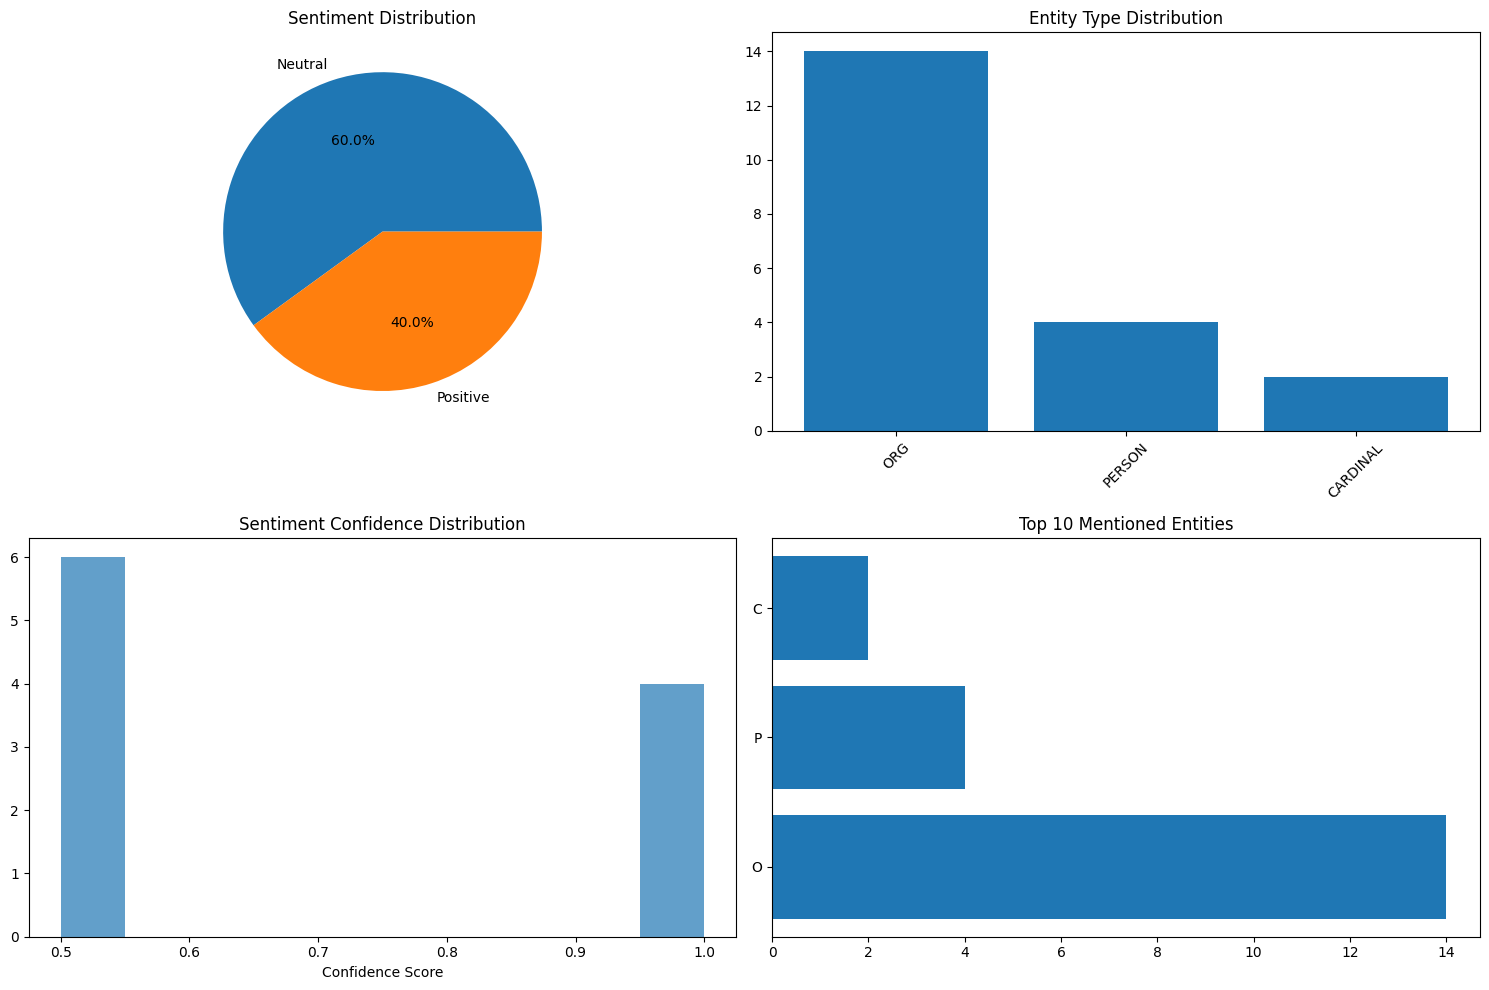

In [1]:
#!/usr/bin/env python3
"""
Amazon Reviews NLP Analysis using spaCy
Author: [Your Team Name]
Date: [Current Date]
"""

import spacy
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import os

def main():
    # Create data directory if needed
    os.makedirs('../data', exist_ok=True)

    # Load spaCy
    try:
        nlp = spacy.load("en_core_web_sm")
    except OSError:
        print("Downloading spaCy model...")
        from spacy.cli import download
        download("en_core_web_sm")
        nlp = spacy.load("en_core_web_sm")

    # Sample data if file doesn't exist
    if not os.path.exists('../data/sample_reviews.csv'):
        sample_reviews = [
            "I love this iPhone 14 Pro! The camera quality is amazing and Apple really outdid themselves.",
            "Samsung Galaxy S23 is okay but the battery life could be better. Samsung needs to improve.",
            "The Nike Air Max shoes are comfortable but expensive. Nike products are always pricey.",
            "This MacBook Pro M2 is incredibly fast. Apple's M2 chip is revolutionary for professionals.",
            "Amazon Echo Dot works well with Alexa. Amazon has great smart home products.",
            "The Sony WH-1000XM4 headphones have excellent noise cancellation. Sony audio quality is top-notch.",
            "Tesla Model 3 is an amazing electric vehicle. Tesla's innovation in EVs is unmatched.",
            "Microsoft Surface Pro 9 is versatile but heavy. Microsoft could make it lighter.",
            "Google Pixel 7 has a great camera but poor battery. Google phones are hit or miss.",
            "Dell XPS 13 laptop is reliable and lightweight. Dell makes quality business laptops."
        ]
        reviews = pd.DataFrame({'review_text': sample_reviews})
        reviews.to_csv('../data/sample_reviews.csv', index=False)
        print("Created sample_reviews.csv")
    else:
        reviews = pd.read_csv('../data/sample_reviews.csv')

    print("Reviews Dataset:")
    print(reviews.head())

    # Sentiment analysis function
    def analyze_sentiment(text):
        doc = nlp(text)

        # Rule-based sentiment
        positive_terms = ['love', 'amazing', 'excellent', 'great', 'good', 'fantastic']
        negative_terms = ['hate', 'terrible', 'awful', 'bad', 'poor', 'disappointing']

        positive_count = sum(1 for token in doc if token.text.lower() in positive_terms)
        negative_count = sum(1 for token in doc if token.text.lower() in negative_terms)

        if positive_count > negative_count:
            return 'Positive', positive_count/(positive_count+negative_count+1e-5)
        elif negative_count > positive_count:
            return 'Negative', negative_count/(positive_count+negative_count+1e-5)
        else:
            return 'Neutral', 0.5

    # Process reviews
    results = []
    all_entities = []

    print("\nProcessing reviews...")
    for idx, row in reviews.iterrows():
        doc = nlp(row['review_text'])
        sentiment, confidence = analyze_sentiment(row['review_text'])

        # Extract entities
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        all_entities.extend([ent[1] for ent in entities])

        results.append({
            'review_id': idx,
            'text': row['review_text'],
            'sentiment': sentiment,
            'confidence': confidence,
            'entities': entities
        })
        print(f"Processed review {idx+1}/{len(reviews)}")

    # Create results DataFrame
    results_df = pd.DataFrame(results)
    print("\nAnalysis Results:")
    print(results_df[['review_id', 'sentiment', 'confidence']].head())

    # Create images directory
    os.makedirs('../images', exist_ok=True)

    # Visualizations
    plt.figure(figsize=(15, 10))

    # Sentiment distribution
    plt.subplot(2, 2, 1)
    sentiment_counts = results_df['sentiment'].value_counts()
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
    plt.title('Sentiment Distribution')

    # Entity distribution
    plt.subplot(2, 2, 2)
    entity_counts = Counter(all_entities)
    plt.bar(entity_counts.keys(), entity_counts.values())
    plt.title('Entity Type Distribution')
    plt.xticks(rotation=45)

    # Confidence distribution
    plt.subplot(2, 2, 3)
    plt.hist(results_df['confidence'], bins=10, alpha=0.7)
    plt.title('Sentiment Confidence Distribution')
    plt.xlabel('Confidence Score')

    # Entity cloud
    plt.subplot(2, 2, 4)
    top_entities = Counter([ent[0] for ent in all_entities]).most_common(10)
    plt.barh([e[0] for e in top_entities], [e[1] for e in top_entities])
    plt.title('Top 10 Mentioned Entities')

    plt.tight_layout()
    plt.savefig('../images/nlp_analysis.png')
    print("Saved visualization to images/nlp_analysis.png")

    # Save results
    results_df.to_csv('../data/nlp_results.csv', index=False)
    print("Results saved to data/nlp_results.csv")

if __name__ == "__main__":
    main()